## **1. EDA**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('EVChargingStationUsage.csv')
df.head()

C:\Users\Vandan\AppData\Local\Temp\ipykernel_16404\143297901.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('EVChargingStationUsage.csv')


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [4]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

### Boxplot

In [5]:
df["Gasoline Savings (gallons)"].value_counts()

Gasoline Savings (gallons)
0.002    266
0.875    248
0.356    247
0.758    246
0.358    243
        ... 
5.538      1
6.985      1
7.210      1
6.690      1
7.074      1
Name: count, Length: 6333, dtype: int64

<AxesSubplot: xlabel='Gasoline Savings (gallons)'>

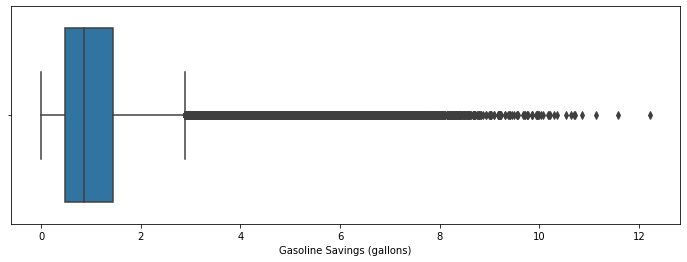

In [6]:
fig = plt.subplots(1, 1, figsize=(12,4))
sns.boxplot(x=df["Gasoline Savings (gallons)"])

In [7]:
df["Fee"].value_counts()

Fee
0.00     133538
1.40        633
1.42        605
1.43        591
1.39        574
          ...  
19.64         1
20.65         1
19.38         1
19.00         1
47.51         1
Name: count, Length: 1817, dtype: int64

<AxesSubplot: xlabel='Fee'>

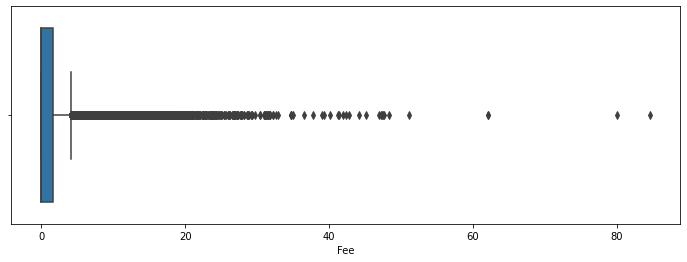

In [8]:
fig = plt.subplots(1, 1, figsize=(12,4))
sns.boxplot(x=df["Fee"])

In [9]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

<AxesSubplot: xlabel='Station Name', ylabel='Gasoline Savings (gallons)'>

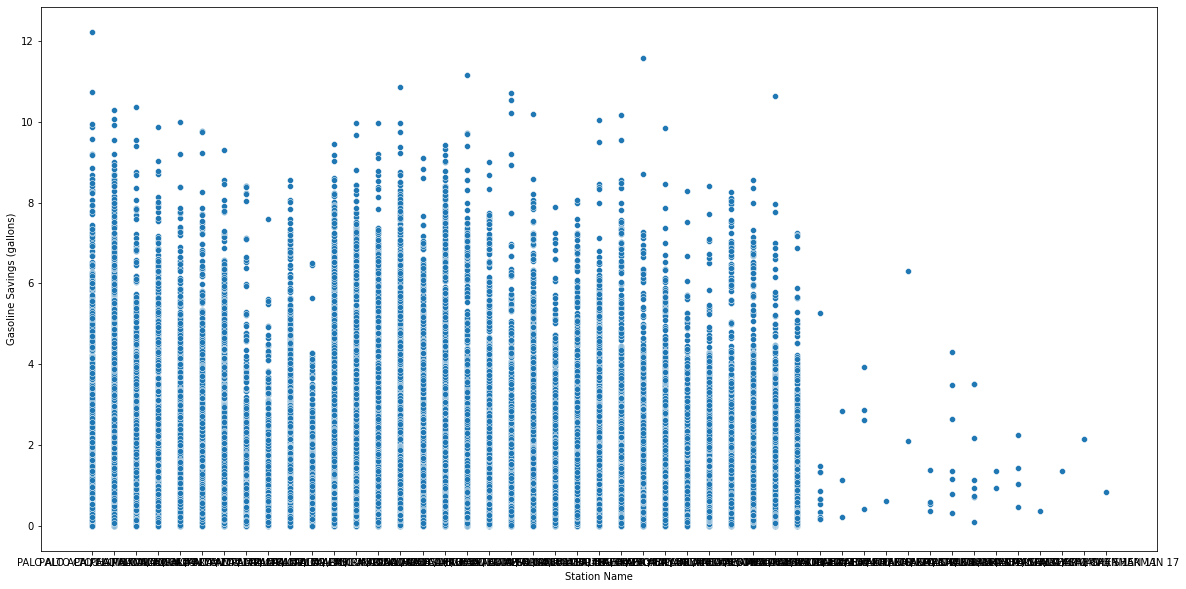

In [10]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
sns.scatterplot(x=df["Station Name"], y=df["Gasoline Savings (gallons)"])

### Number of Stations at a unique Address

In [11]:
# fig = plt.gcf()
# fig.set_size_inches(20, 10)
# sns.scatterplot(x=df["Address 1"], y=df["Station Name"])

# dist = df.groupby("Address 1")["Station Name"].agg(list).reset_index()
# dist

dist = df.groupby("Address 1")["Station Name"].nunique().reset_index()
dist.rename(columns={"Station Name": "Number of Stations"}, inplace=True)
dist

,Address 1,Number of Stations
0,1213 Newell Rd,3
1,1514 Walnut Dr,1
2,1520 Walnut Dr,2
3,250 Hamilton Ave,2
4,275 Cambridge Ave,4
5,350 Sherman Ave,11
6,358 Sherman Ave,2
7,3700 Middlefield Rd,6
8,400 Cambridge Ave,2
9,445 Bryant St,7


<AxesSubplot: xlabel='Latitude', ylabel='Longitude'>

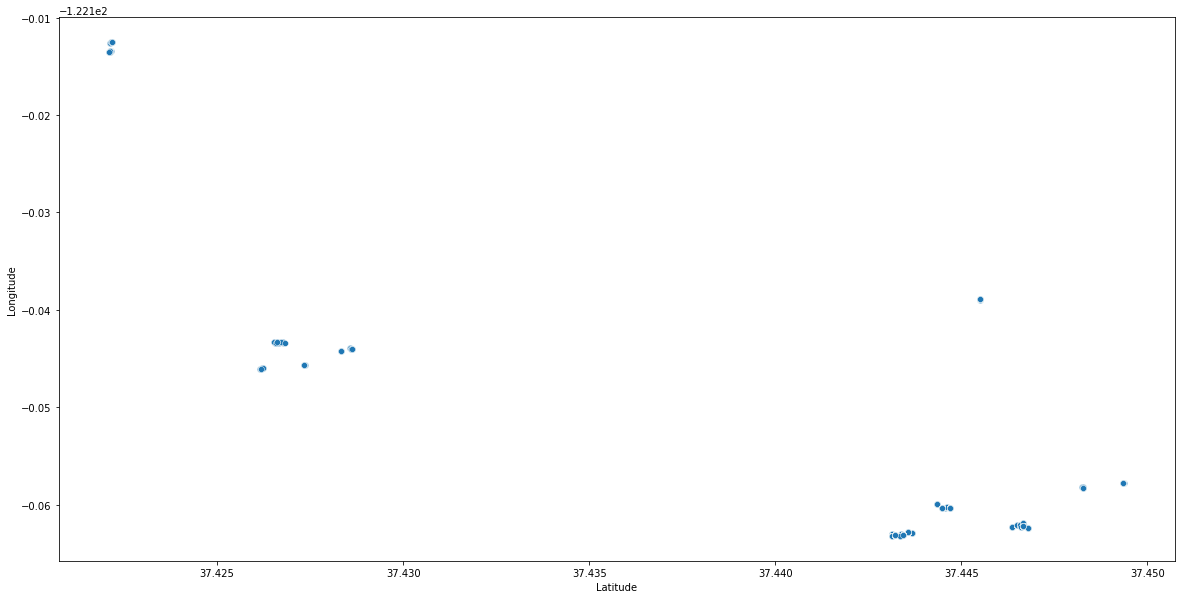

In [12]:
fig = plt.gcf()
fig.set_size_inches(20, 10)
sns.scatterplot(x=df["Latitude"], y=df["Longitude"])

### Null Values in the dataset? (doubt)

In [13]:
df.isnull().sum()

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

In [14]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

### Distribution of Stations

In [15]:
station_name_dist = df["Station Name"].value_counts()
station_name_dist

Station Name
PALO ALTO CA / HAMILTON #2        23721
PALO ALTO CA / HAMILTON #1        14888
PALO ALTO CA / WEBSTER #1         14432
PALO ALTO CA / BRYANT #2          14389
PALO ALTO CA / HIGH #4            13898
PALO ALTO CA / BRYANT #1          13436
PALO ALTO CA / WEBSTER #2         12669
PALO ALTO CA / CAMBRIDGE #1       11163
PALO ALTO CA / HIGH #1            10756
PALO ALTO CA / WEBSTER #3         10484
PALO ALTO CA / TED THOMPSON #1     9814
PALO ALTO CA / CAMBRIDGE #2        9256
PALO ALTO CA / MPL #6              8996
PALO ALTO CA / HIGH #3             8317
PALO ALTO CA / MPL #4              7787
PALO ALTO CA / MPL #5              7544
PALO ALTO CA / HIGH #2             6930
PALO ALTO CA / RINCONADA LIB 3     6499
PALO ALTO CA / RINCONADA LIB 1     6212
PALO ALTO CA / BRYANT #6           5857
PALO ALTO CA / RINCONADA LIB 2     5553
PALO ALTO CA / BRYANT #5           5332
PALO ALTO CA / CAMBRIDGE #5        4556
PALO ALTO CA / CAMBRIDGE #3        4476
PALO ALTO CA / BRYANT #3   

<AxesSubplot: ylabel='count'>

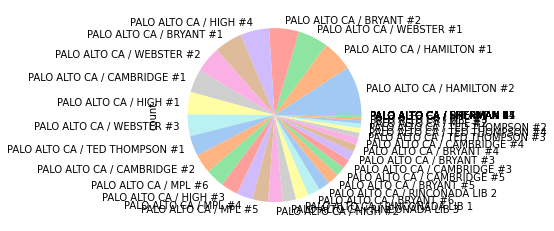

In [16]:
piec_colors = sns.color_palette('pastel')[0:len(station_name_dist)]
station_name_dist.plot(kind = 'pie', colors=piec_colors)

In [17]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [18]:
cols = list(df.columns)

for x in cols:
    print(f"{x} = {len(df[x].value_counts())}")

Station Name = 47
MAC Address = 83
Org Name = 2
Start Date = 244798
Start Time Zone = 3
End Date = 244159
End Time Zone = 3
Transaction Date (Pacific Time) = 240905
Total Duration (hh:mm:ss) = 31025
Charging Time (hh:mm:ss) = 22473
Energy (kWh) = 118061
GHG Savings (kg) = 15535
Gasoline Savings (gallons) = 6333
Port Type = 2
Port Number = 2
Plug Type = 2
EVSE ID = 51
Address 1 = 20
City = 1
State/Province = 1
Postal Code = 3
Country = 1
Latitude = 62
Longitude = 64
Currency = 4
Fee = 1817
Ended By = 16
Plug In Event Id = 36838
Driver Postal Code = 985
User ID = 27698
County = 2
System S/N = 81
Model Number = 10


### Distribution of Model Numbers

In [19]:
model_number_dist = df["Model Number"].value_counts()
model_number_dist

Model Number
CT4020-HD-GW          84886
CT4020-HD             45129
CT2100-HD-CDMA-CCR    11377
CT2000-HD-CCR         10052
CT2100-HD-CCR          8012
CT2000-HD-GW1-CCR      5737
CTHDR-S                4134
CTHCR-S                3941
CTHDR                  3623
CT4010-HD-GW           3576
Name: count, dtype: int64

<AxesSubplot: ylabel='count'>

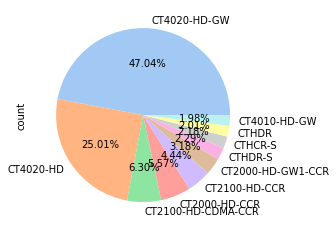

In [20]:
piec_colors = sns.color_palette('pastel')[0:len(model_number_dist)]
model_number_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

## **2. Data Transformations**

In [21]:
df.dtypes

Station Name                        object
MAC Address                         object
Org Name                            object
Start Date                          object
Start Time Zone                     object
End Date                            object
End Time Zone                       object
Transaction Date (Pacific Time)     object
Total Duration (hh:mm:ss)           object
Charging Time (hh:mm:ss)            object
Energy (kWh)                       float64
GHG Savings (kg)                   float64
Gasoline Savings (gallons)         float64
Port Type                           object
Port Number                          int64
Plug Type                           object
EVSE ID                            float64
Address 1                           object
City                                object
State/Province                      object
Postal Code                          int64
Country                             object
Latitude                           float64
Longitude  

In [22]:
from sklearn import preprocessing

In [23]:
le = preprocessing.LabelEncoder()

In [24]:
le.fit(list(df["Station Name"]))
df["Station Name Cat"] = df["Station Name"].apply(lambda x: le.transform([x])[0])

In [25]:
df[["Station Name", "Station Name Cat"]]

,Station Name,Station Name Cat
0,PALO ALTO CA / HAMILTON #1,12
1,PALO ALTO CA / HAMILTON #1,12
2,PALO ALTO CA / HAMILTON #1,12
3,PALO ALTO CA / HAMILTON #1,12
4,PALO ALTO CA / HAMILTON #1,12
...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,42
259411,PALO ALTO CA / WEBSTER #1,44
259412,PALO ALTO CA / MPL #4,21
259413,PALO ALTO CA / WEBSTER #1,44
